# imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.impute import KNNImputer
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [170]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import KFold

In [72]:
from sklearn.linear_model import LogisticRegression

In [188]:
global_metrics = pd.DataFrame(columns=['Precision', 'Recall', 'Accuracy','f1_Score', 'feature_count'])

# Loading Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv(
    '/content/drive/MyDrive/datasets/TitanicDisaster-Survival/train.csv', index_col='PassengerId'
)

In [5]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# Data Pre-processing and EDA

## drop unnecesary columns and duplicate rows

In [6]:
df = data.copy()

In [7]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

## Type Converstion

In [11]:
df.select_dtypes('object')

,Sex,Embarked
PassengerId,,
1,male,S
2,female,C
3,female,S
4,female,S
5,male,S
...,...,...
887,male,S
888,female,S
889,female,S


In [12]:
df['Sex'].astype('category').cat.codes

PassengerId
1      1
2      0
3      0
4      0
5      1
      ..
887    1
888    0
889    0
890    1
891    1
Length: 891, dtype: int8

In [13]:
for col in df.select_dtypes('object').columns:
    df[col] = df[col].astype('category').cat.codes

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int8   
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int8   
dtypes: float64(2), int64(4), int8(2)
memory usage: 50.5 KB


## Treating Missing Values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int8   
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int8   
dtypes: float64(2), int64(4), int8(2)
memory usage: 50.5 KB


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int8   
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int8   
dtypes: float64(2), int64(4), int8(2)
memory usage: 50.5 KB


In [17]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [18]:
# imputing missing values
imputer = KNNImputer(n_neighbors=7)
imputer.fit(X=df)

KNNImputer(n_neighbors=7)

In [19]:
imputed_data = imputer.transform(df)
imputed_data.shape

(891, 8)

In [20]:
idf = pd.DataFrame(imputed_data)
idf.head()

,0,1,2,3,4,5,6,7
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0


In [21]:
idf.columns = df.columns
idf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0


## Balancing dataset

In [22]:
counts = idf.Survived.value_counts()
counts

0.0    549
1.0    342
Name: Survived, dtype: int64

In [23]:
counts.values

array([549, 342])

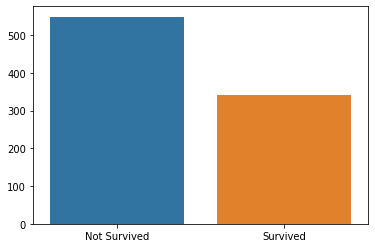

In [24]:
# dataset is imbalance
sns.barplot(x=['Not Survived', 'Survived'], y=counts.values)

In [25]:
counts

0.0    549
1.0    342
Name: Survived, dtype: int64

In [26]:
(1 - 342/549)*100

37.704918032786885

In [27]:
idf.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [28]:
over_sampler = RandomOverSampler(random_state=42)
features, survived = over_sampler.fit_resample(idf.drop(columns=['Survived']), idf.Survived)

In [29]:
survived.shape

(1098,)

In [30]:
survived.value_counts()

0.0    549
1.0    549
Name: Survived, dtype: int64

In [31]:
survived

0       0.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
1093    1.0
1094    1.0
1095    1.0
1096    1.0
1097    1.0
Name: Survived, Length: 1098, dtype: float64

In [32]:
features['Survived'] = survived

## Analysis

In [33]:
bdf = features
bdf.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0,0.0
1,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,1.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,2.0,1.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,2.0,1.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,2.0,0.0


In [ ]:
bdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,1098.0,2.249545,0.852699,1.00,1.000,3.0,3.0000,3.0000
Sex,1098.0,0.587432,0.492521,0.00,0.000,1.0,1.0000,1.0000
Age,1098.0,29.731496,13.409531,0.42,21.000,29.0,38.0000,80.0000
SibSp,1098.0,0.518215,1.035441,0.00,0.000,0.0,1.0000,8.0000
Parch,1098.0,0.390710,0.796177,0.00,0.000,0.0,1.0000,6.0000
Fare,1098.0,34.733071,51.288602,0.00,7.925,15.5,34.5844,512.3292
Embarked,1098.0,1.505464,0.812655,-1.00,1.000,2.0,2.0000,2.0000
Survived,1098.0,0.500000,0.500228,0.00,0.000,0.5,1.0000,1.0000


In [ ]:
bdf.groupby(by='Survived', ).mean()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,
0.0,2.531876,0.852459,31.067244,0.553734,0.32969,22.117887,1.641166
1.0,1.967213,0.322404,28.395748,0.482696,0.45173,47.348254,1.369763


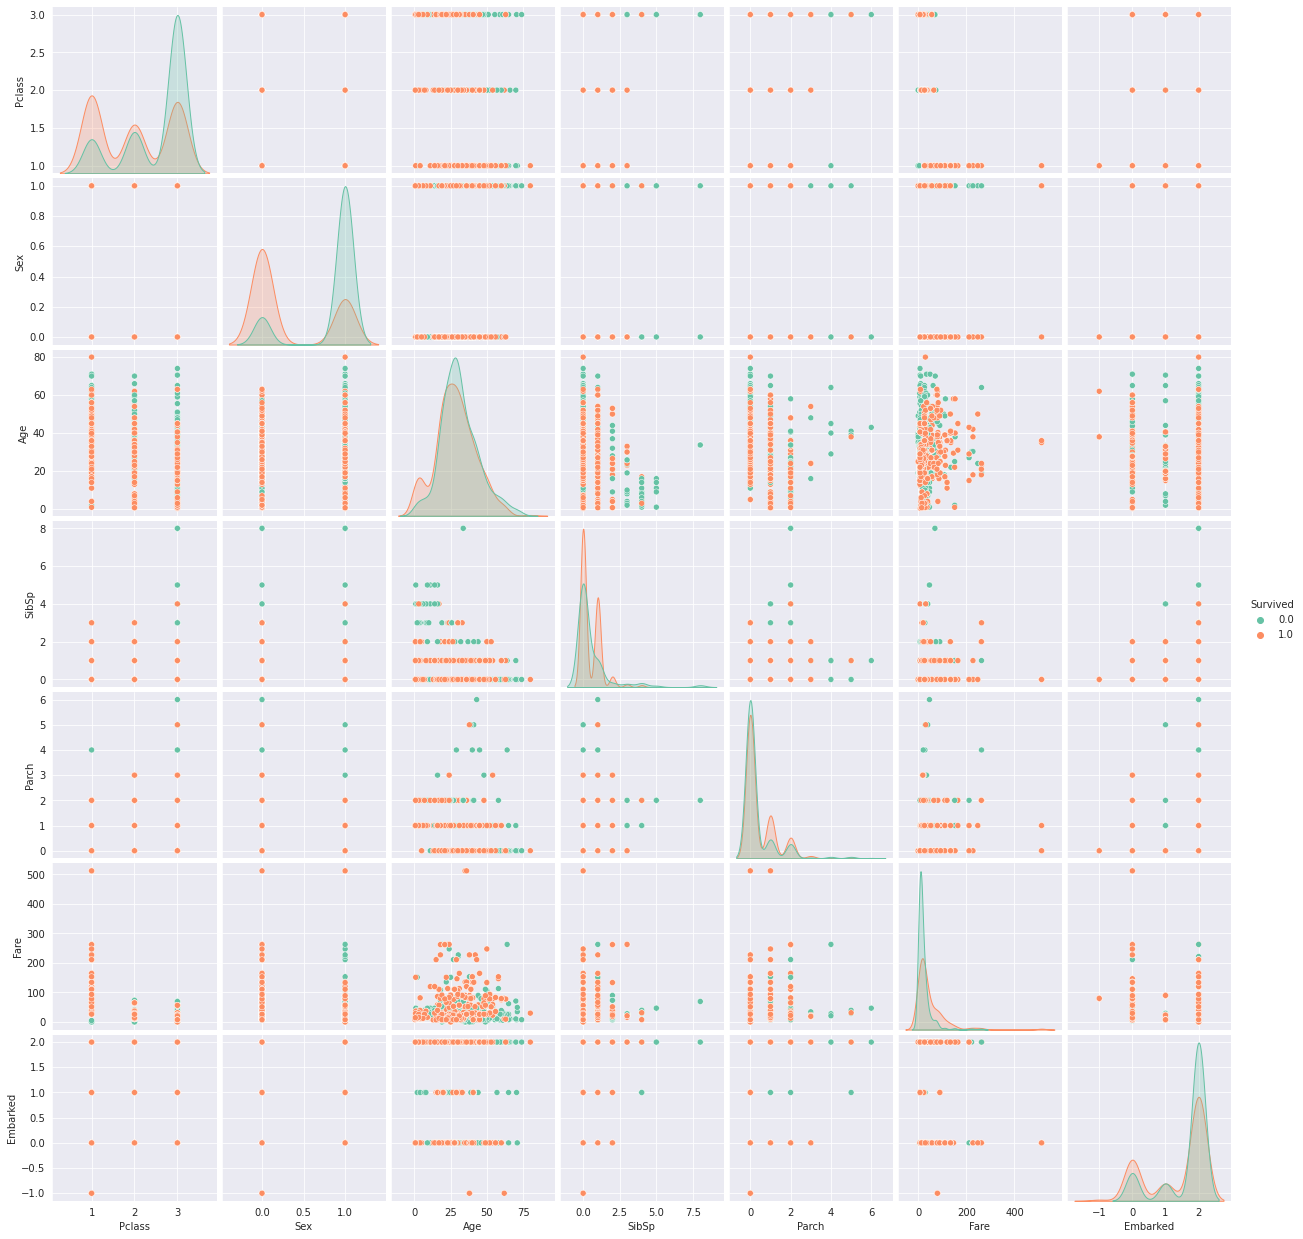

In [34]:
sns.set_style(style='darkgrid')
sns.pairplot(data=bdf, hue='Survived', palette='Set2')

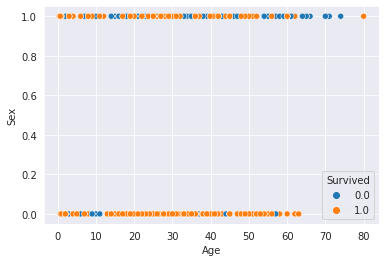

In [35]:
sns.scatterplot(data=bdf, x='Age', y='Sex', hue='Survived')

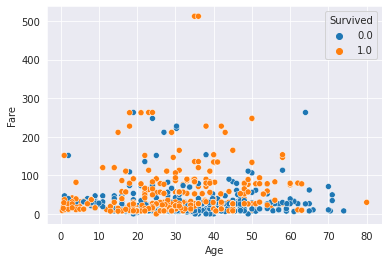

In [36]:
sns.scatterplot(data=bdf, x='Age', y='Fare', hue='Survived')

## Data Split

In [39]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0,0.0
1,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,1.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,2.0,1.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,2.0,1.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,2.0,0.0


In [53]:
features.drop(columns=['Survived',], inplace=True)

In [81]:
xtrain, xtest, ytrain, ytest = train_test_split(features, survived.astype(np.int8), test_size=0.3, random_state=42)

In [82]:
xtrain.shape[1] == xtest.shape[1]

True

## Feature Selection

In [83]:
scores = mutual_info_classif(xtrain, ytrain, n_neighbors=3, random_state=42)
scores

array([0.05897909, 0.17007163, 0.08898194, 0.01267713, 0.00888864,
       0.15551626, 0.        ])

In [84]:
scores_df = pd.DataFrame(scores, columns=['Scores',], index=features.columns) 
scores_df = scores_df.sort_values(by='Scores', ascending=False)
scores_df

,Scores
Sex,0.170072
Fare,0.155516
Age,0.088982
Pclass,0.058979
SibSp,0.012677
Parch,0.008889
Embarked,0.000000


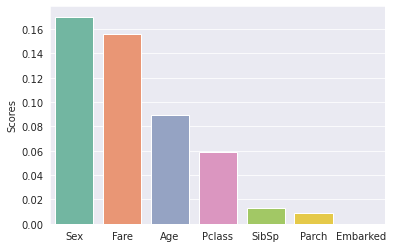

In [85]:
sns.barplot(data=scores_df,x=scores_df.index, y='Scores', palette='Set2')

# Logistic Regression

In [88]:
best_features = list(scores_df.index)

In [89]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(xtrain[best_features[:2]], ytrain)

LogisticRegression(random_state=42)

In [90]:
ypred = logistic_model.predict(xtest[best_features[:2]])

In [91]:
ypred

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,

In [96]:
cm  = confusion_matrix(ytest, ypred)
cm

array([[141,  24],
       [ 57, 108]])

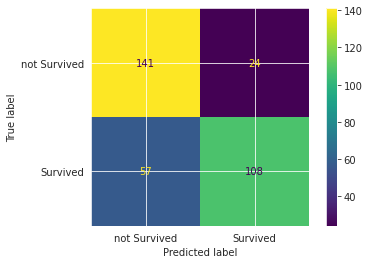

In [102]:
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not Survived', 'Survived'])
cmd.plot()

In [104]:
accuracy_score(y_true=ytest, y_pred=ypred)

0.7545454545454545

In [105]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [152]:
grid = GridSearchCV(
    logistic_model,
    param_grid={
        'C': [1, 5, 10, 15, 21, 25],
        'penalty':  ['l2',],
        'solver' : ['newton-cg', 'lbfgs', 'saga','liblinear'],
        'class_weight': ['balanced',],
        'tol': [0.0001, 0.001],
        'random_state': [42,],
        'max_iter':[5000,],
        
    }, scoring='f1', cv=5, verbose=1
)
grid.fit(xtrain[best_features[:2]], ytrain)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1, 5, 10, 15, 21, 25],
                         'class_weight': ['balanced'], 'max_iter': [5000],
                         'penalty': ['l2'], 'random_state': [42],
                         'solver': ['newton-cg', 'lbfgs', 'saga', 'liblinear'],
                         'tol': [0.0001, 0.001]},
             scoring='f1', verbose=1)

In [153]:
grid.best_estimator_, grid.best_score_

(LogisticRegression(C=1, class_weight='balanced', max_iter=5000, random_state=42,
                    solver='saga'), 0.7516204677583989)

In [154]:
grid2 = GridSearchCV(
    logistic_model,
    param_grid={
        'C': [1, 5, 10, 15, 21, 25],
        'penalty':  ['l2'],
        'solver' : ['newton-cg', 'lbfgs', 'saga','liblinear'],
        'class_weight': ['balanced',],
        'tol': [0.0001, 0.001],
        'random_state': [42,],
        'max_iter':[6000,],
        
    }, scoring='f1', cv=5, verbose=1
)
grid2.fit(xtrain[best_features[:3]], ytrain)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1, 5, 10, 15, 21, 25],
                         'class_weight': ['balanced'], 'max_iter': [6000],
                         'penalty': ['l2'], 'random_state': [42],
                         'solver': ['newton-cg', 'lbfgs', 'saga', 'liblinear'],
                         'tol': [0.0001, 0.001]},
             scoring='f1', verbose=1)

In [155]:
grid2.best_estimator_, grid2.best_score_

(LogisticRegression(C=1, class_weight='balanced', max_iter=6000, random_state=42,
                    solver='saga'), 0.7541975727725899)

In [157]:
grid4 = GridSearchCV(
    logistic_model,
    param_grid={
        'C': [1, 5, 10, 15, 21, 25],
        'penalty':  ['l2'],
        'solver' : ['newton-cg', 'lbfgs', 'saga','liblinear'],
        'class_weight': ['balanced',],
        'tol': [0.0001, 0.001],
        'random_state': [42,],
        'max_iter':[6000,],
        
    }, scoring='f1', cv=5, verbose=1
)
grid4.fit(xtrain[best_features[:4]], ytrain)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1, 5, 10, 15, 21, 25],
                         'class_weight': ['balanced'], 'max_iter': [6000],
                         'penalty': ['l2'], 'random_state': [42],
                         'solver': ['newton-cg', 'lbfgs', 'saga', 'liblinear'],
                         'tol': [0.0001, 0.001]},
             scoring='f1', verbose=1)

In [159]:
grid4.best_estimator_, grid4.best_score_

(LogisticRegression(C=1, class_weight='balanced', max_iter=6000, random_state=42,
                    solver='newton-cg'), 0.7968055363219365)

In [161]:
grid5 = GridSearchCV(
    logistic_model,
    param_grid={
        'C': [1, 5, 10, 15, 21, 25],
        'penalty':  ['l2'],
        'solver' : ['newton-cg', 'lbfgs', 'saga','liblinear'],
        'class_weight': ['balanced',],
        'tol': [0.0001, 0.001],
        'random_state': [42,],
        'max_iter':[6000,],
        
    }, scoring='f1', cv=5, verbose=1
)
grid5.fit(xtrain[best_features[:5]], ytrain)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1, 5, 10, 15, 21, 25],
                         'class_weight': ['balanced'], 'max_iter': [6000],
                         'penalty': ['l2'], 'random_state': [42],
                         'solver': ['newton-cg', 'lbfgs', 'saga', 'liblinear'],
                         'tol': [0.0001, 0.001]},
             scoring='f1', verbose=1)

In [162]:
grid4.best_estimator_, grid4.best_score_

(LogisticRegression(C=1, class_weight='balanced', max_iter=6000, random_state=42,
                    solver='newton-cg'), 0.7968055363219365)

In [163]:
best_logistic_model = grid4.best_estimator_
ypred = best_logistic_model.predict(xtest[best_features[:4]])

In [165]:
accuracy_score(y_true=ytest, y_pred=ypred)

0.7848484848484848

In [167]:
precision_score(y_true=ytest, y_pred=ypred, average='binary')

0.8012820512820513

In [168]:
recall_score(y_true=ytest, y_pred=ypred, average='binary')

0.7575757575757576

In [169]:
f1_score(y_true=ytest, y_pred=ypred, average='binary')

0.778816199376947

## Cross validation

In [212]:
def crosss_validate(estimator, x, y, model_name, **params):
    folds = KFold(n_splits=6)
    scores = []
    iteration = 1
    for train_idx, test_idx in folds.split(x, y):
        # fetch train data index for that fold
        xtrain = x.iloc[train_idx]
        ytrain = y.iloc[train_idx]

        #fetch test data index for that fold
        xtest = x.iloc[test_idx]
        ytest = y.iloc[test_idx]

        # model
        model = estimator(**params)
        model.fit(xtrain, ytrain)
        ypred = model.predict(xtest)

        # evaluate
        accuracy = accuracy_score(y_true=ytest, y_pred=ypred)
        precision= precision_score(y_true=ytest, y_pred=ypred, average='binary')
        recall = recall_score(y_true=ytest, y_pred=ypred, average='binary')
        f1 = f1_score(y_true=ytest, y_pred=ypred, average='binary')
        scores.append([precision, recall, accuracy, f1])
        print(f"Fold {iteration}.... Done")
        iteration += 1
    mean_scores  = [s for s in np.array(scores).mean(axis=0)]
    mean_scores.append(xtrain.shape[1])
    return pd.DataFrame([mean_scores,], columns=['Precision', 'Recall', 'Accuracy','f1_Score', 'feature_count'], index=[model_name,])


In [215]:
cv = crosss_validate(LogisticRegression, features[best_features[:4]], survived,'LogisticRegression', C=1, class_weight='balanced',
                max_iter=5000, random_state=42, solver='newton-cg')
cv

Fold 1.... Done
Fold 2.... Done
Fold 3.... Done
Fold 4.... Done
Fold 5.... Done
Fold 6.... Done


,Precision,Recall,Accuracy,f1_Score,feature_count
LogisticRegression,0.755027,0.787968,0.785974,0.766542,4


In [216]:
global_metrics = global_metrics.append(cv)

In [217]:
global_metrics

,Precision,Recall,Accuracy,f1_Score,feature_count
LogisticRegression,0.755027,0.787968,0.785974,0.766542,4


# SVM